In [1]:
from Models_Util import *

## Reading the input

In [2]:
math_problems = pd.read_csv("../Data/final_data.csv", index_col=0)
math_problems.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,has_eq,...,number_of_math_vocab,number_of_digits,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,False,...,2,2,2,True,False,0,False,0,False,0
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,False,...,4,0,0,False,True,2,False,0,True,1
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra,"If , then find .",1,2,False,False,False,False,...,0,4,4,True,True,2,False,0,True,3
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra,Let and . What is ?,3,3,False,False,False,False,...,0,1,1,True,False,0,False,0,True,1
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,False,...,2,0,0,False,False,0,False,0,False,0


In [3]:
math_problems.shape

(4236, 56)

In [4]:
# Defining the results array
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])

In [5]:
# Encoding type column
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
math_problems['type'] = math_problems['type'].replace(size_mapping)

## Experiment 1: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features (eg: has_exp, has_log)
3. no_of_equations
4. no_of_variables

Run Random forest for the default 5 level classification and report the results

In [6]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

### Random Forest

int64
Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.4490481522956327
train_evaluation:

              precision    recall  f1-score   support

           1       0.84      0.64      0.73      1186
           2       0.58      0.62      0.60       842
           3       0.56      0.66      0.60       757
           4       0.52      0.72      0.60       640
           5       0.72      0.62      0.67      1040

    accuracy                           0.64      4465
   macro avg       0.64      0.65      0.64      4465
weighted avg       0.67      0.64      0.65      4465

[[754 193 114  75  50]
 [ 73 519 101  88  61]
 [ 27  79 497  91  63]
 [ 16  37  52 461  74]
 [ 23  65 129 178 645]]

test_evaluation:

        

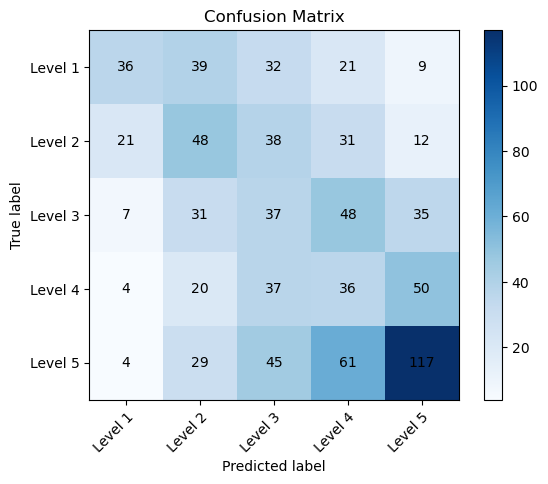

Feature Importance Rankings:
1. no_of_variables: 14.399798506905165
2. large_words_cat: 13.08673550518834
3. no_of_equations: 10.811987239241798
4. words_per_sentence_cat: 10.07021094163426
5. word_count_cat: 10.042703089416849
6. average_word_length_cat: 8.161571615564814
7. type: 6.975360574783074
8. has_symbol: 5.441197435094101
9. has_pow: 5.128601991558081
10. sentence_count_cat: 3.7695279072173014
11. has_fraction: 3.4727765898257505
12. has_digits: 2.9244710487720846
13. has_neq: 1.9908544478192027
14. has_eq: 1.7239230130057612
15. has_mod: 1.204759457622578
16. has_logarithm: 0.7837430109831348
17. has_exp: 0.011777625367705467


In [26]:
scores = rf_model(data1, scores=scores, experiment="Experiment1+SMOTE")

In [28]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.638967,0.313509


int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.34858934305869643
train_evaluation:

              precision    recall  f1-score   support

           1       0.78      0.39      0.52       577
           2       0.51      0.51      0.51       670
           3       0.47      0.57      0.51       622
           4       0.43      0.62      0.51       541
           5       0.67      0.61      0.63       978

    accuracy                           0.55      3388
   macro avg       0.57      0.54      0.54      3388
weighted avg       0.58      0.55      0.55      3388

[[225 147  90  66  49]
 [ 30 342 115 104  79]
 [ 14  71 354 102  81]
 [ 10  41  62 338  90]
 [ 11  64 133 176 594]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.53      0.28      0.36       138
           2       0.26      0.31    

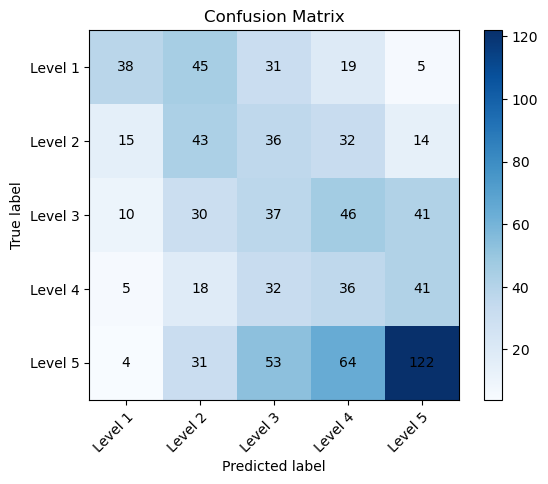

Feature Importance Rankings:
1. no_of_variables: 15.914957486187783
2. large_words_cat: 11.649487190375757
3. no_of_equations: 10.649397793482638
4. word_count_cat: 10.634999922609255
5. words_per_sentence_cat: 9.6003394450648
6. average_word_length_cat: 8.387032087681984
7. type: 6.753946807281341
8. has_pow: 5.079194891543679
9. has_symbol: 4.155235288683179
10. has_fraction: 3.481827822173824
11. sentence_count_cat: 3.2710747850132686
12. has_digits: 2.672952422094219
13. has_neq: 2.4795346973656347
14. has_eq: 2.1510690274486035
15. has_mod: 1.9455543830352675
16. has_logarithm: 1.1616570888356479
17. has_exp: 0.011738861123117193


In [29]:
scores = rf_model(data1, use_smote_technique=0, scores=scores, experiment="Experiment1")

### Light GBM

Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.4528555431131019
train_evaluation:

              precision    recall  f1-score   support

           1       0.84      0.66      0.74      1131
           2       0.59      0.55      0.57       955
           3       0.55      0.63      0.59       770
           4       0.49      0.71      0.58       620
           5       0.71      0.64      0.67       989

    accuracy                           0.64      4465
   macro avg       0.64      0.64      0.63      4465
weighted avg       0.66      0.64      0.64      4465

[[748 177  97  68  41]
 [ 77 529 136 130  83]
 [ 28  86 488  90  78]
 [ 12  41  64 442  61]
 [ 28  60 108 163 630]]

test_evaluation:

              precision

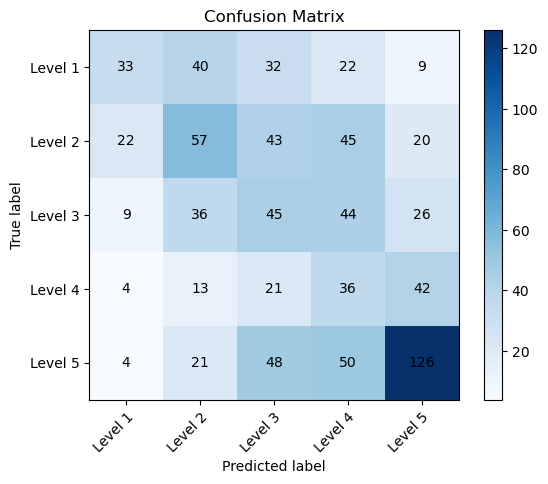

In [7]:
scores = light_GBM(data1, scores=scores, experiment="Experiment1 LGBM")

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 30, 'reg_alpha': 1, 'reg_lambda': 0}
Best Score:  0.33265360365659713
train_evaluation:

              precision    recall  f1-score   support

           1       0.73      0.36      0.48       588
           2       0.50      0.45      0.47       735
           3       0.41      0.53      0.46       576
           4       0.35      0.54      0.43       503
           5       0.63      0.57      0.59       986

    accuracy                           0.50      3388
   macro avg       0.52      0.49      0.49      3388
weighted avg       0.54      0.50      0.50      3388

[[211 154  89  80  54]
 [ 38 331 136 134  96]
 [ 18  76 307  95  80]
 [  9  39  77 274 104]
 [ 14  65 145 203 559]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.51      0.28      0.36       133
           2       0.30      0.29      0.29       

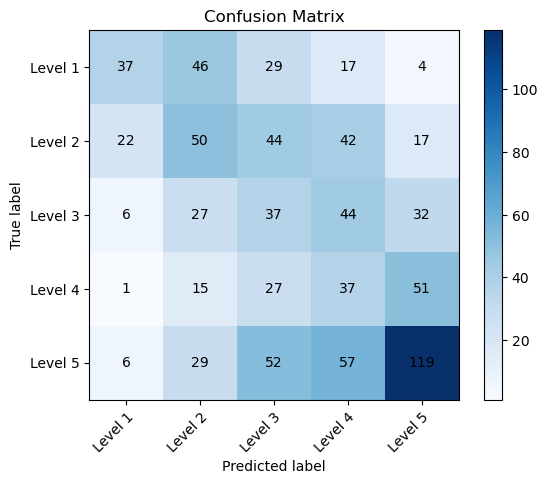

In [8]:
scores = light_GBM(data1, scores=scores, experiment="Experiment1 LGBM + No SMOTE", use_smote_technique=0)

## Experiment 2: 

Consider the following features

1. Categorised linguistic features
2. All numerical math features

Run Random forest with default 5 class classification and report the results

In [9]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

### Random Forest

int64
Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.44591265397536395
train_evaluation:

              precision    recall  f1-score   support

           1       0.85      0.69      0.76      1102
           2       0.63      0.63      0.63       899
           3       0.62      0.69      0.65       801
           4       0.52      0.79      0.63       582
           5       0.78      0.64      0.70      1081

    accuracy                           0.68      4465
   macro avg       0.68      0.69      0.68      4465
weighted avg       0.70      0.68      0.68      4465

[[762 142  80  72  46]
 [ 73 565  99 102  60]
 [ 30  86 552  85  48]
 [  8  33  34 462  45]
 [ 20  67 128 172 694]]

test_evaluation:

       

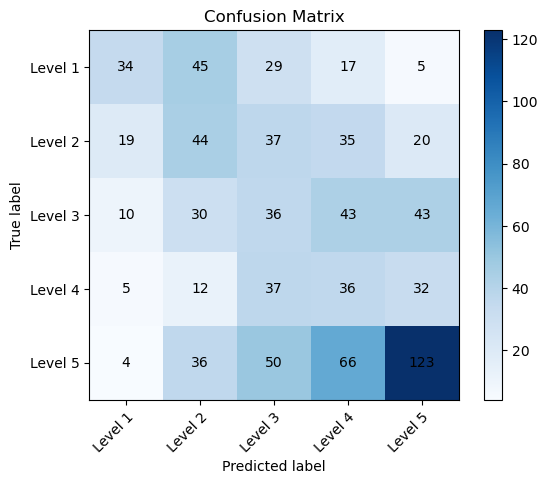

Feature Importance Rankings:
1. large_words_cat: 10.39171727657423
2. no_of_variables: 10.27769469291226
3. word_count_cat: 8.951883025269034
4. words_per_sentence_cat: 7.737116520919174
5. number_of_digits: 7.345482394619948
6. no_of_equations: 7.161902399432122
7. max_degree_of_equations: 7.102019363579573
8. symbol_count: 6.981911374830734
9. average_word_length_cat: 6.616733911551735
10. number_of_numbers: 6.32960505258896
11. no_of_pow: 5.822653860807546
12. type: 5.4714741730890175
13. fracs_count: 3.393517678642504
14. sentence_count_cat: 2.73374280221667
15. neqlts_count: 1.3083115396730185
16. eqlts_count: 1.1636887921643448
17. mod_count: 0.7589615843151144
18. log_count: 0.45022764260588544
19. no_of_exps: 0.0013559142081357052


In [31]:
scores = rf_model(data2, scores=scores, experiment="Experiment2+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.3482934863596554
train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.44      0.57       541
           2       0.59      0.56      0.58       700
           3       0.54      0.67      0.60       604
           4       0.49      0.72      0.58       530
           5       0.74      0.65      0.69      1013

    accuracy                           0.61      3388
   macro avg       0.63      0.61      0.60      3388
weighted avg       0.65      0.61      0.61      3388

[[238 127  72  62  42]
 [ 25 393  97 108  77]
 [ 12  59 405  77  51]
 [  7  31  46 382  64]
 [  8  55 134 157 659]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.44      0.26      0.33       123
           2       0.29   

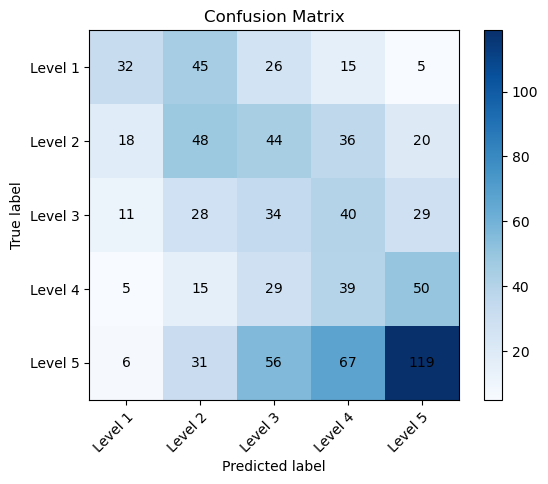

Feature Importance Rankings:
1. no_of_variables: 11.169414843569552
2. large_words_cat: 10.506930680158808
3. word_count_cat: 8.599756116424793
4. number_of_digits: 7.618453848145059
5. words_per_sentence_cat: 7.476804199362336
6. symbol_count: 7.048319861212063
7. no_of_equations: 6.644969237193388
8. number_of_numbers: 6.512935911412633
9. no_of_pow: 6.326028619408172
10. average_word_length_cat: 5.996721336349061
11. max_degree_of_equations: 5.952699471730308
12. type: 5.491189319063822
13. fracs_count: 3.3618767298058954
14. sentence_count_cat: 3.0257833550145636
15. eqlts_count: 1.4677777680125126
16. neqlts_count: 1.3636093858438327
17. mod_count: 0.9603116875048261
18. log_count: 0.4701946558589466
19. no_of_exps: 0.006222973929441448


In [32]:
scores = rf_model(data2, use_smote_technique=0, scores=scores, experiment="Experiment2")

### Light GBM

Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 1}
Best Score:  0.45576707726763716
train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.73      0.77      1003
           2       0.69      0.60      0.64      1029
           3       0.61      0.69      0.65       788
           4       0.55      0.76      0.64       650
           5       0.75      0.67      0.71       995

    accuracy                           0.68      4465
   macro avg       0.68      0.69      0.68      4465
weighted avg       0.70      0.68      0.69      4465

[[734 123  62  56  28]
 [ 89 616 121 122  81]
 [ 28  63 547  92  58]
 [ 12  29  55 494  60]
 [ 30  62 108 129 666]]

test_evaluation:

              precisio

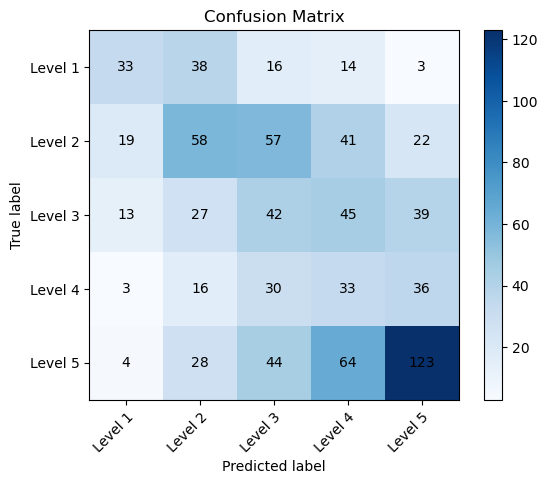

In [10]:
scores = light_GBM(data2, scores=scores, experiment="Experiment2 LGBM + SMOTE")

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.3335315878223814
train_evaluation:

              precision    recall  f1-score   support

           1       0.83      0.53      0.65       451
           2       0.68      0.58      0.62       786
           3       0.63      0.76      0.69       626
           4       0.59      0.79      0.68       584
           5       0.77      0.73      0.75       941

    accuracy                           0.69      3388
   macro avg       0.70      0.68      0.68      3388
weighted avg       0.70      0.69      0.68      3388

[[241  95  47  37  31]
 [ 30 453 116 108  79]
 [  5  43 477  53  48]
 [  5  31  36 464  48]
 [  9  43  78 124 687]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.44      0.31      0.37       102
           2       0.36      0.30      0.33       1

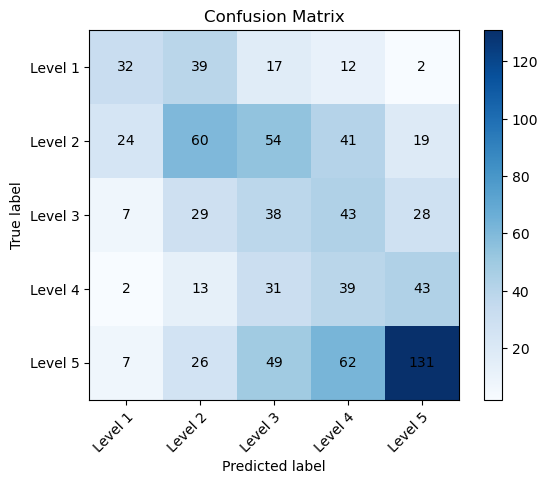

In [11]:
scores = light_GBM(data2, scores=scores, experiment="Experiment2 LGBM", use_smote_technique=0)

## Experiment 3: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features
3. POS features
4. no_of_equations
5. no_of_variables

Run Random Forest on the default 5 class classification and report the results



### Random Forest

In [13]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.4613661814109743
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.72      0.80      1124
           2       0.69      0.71      0.70       866
           3       0.68      0.75      0.71       808
           4       0.60      0.83      0.69       648
           5       0.82      0.71      0.76      1019

    accuracy                           0.74      4465
   macro avg       0.74      0.74      0.73      4465
weighted avg       0.76      0.74      0.74      4465

[[804 152  86  59  23]
 [ 44 614  74  80  54]
 [ 27  57 605  67  52]
 [  9  33  35 535  36]
 [  9  37  93 152 728]]

test_evaluation:

        

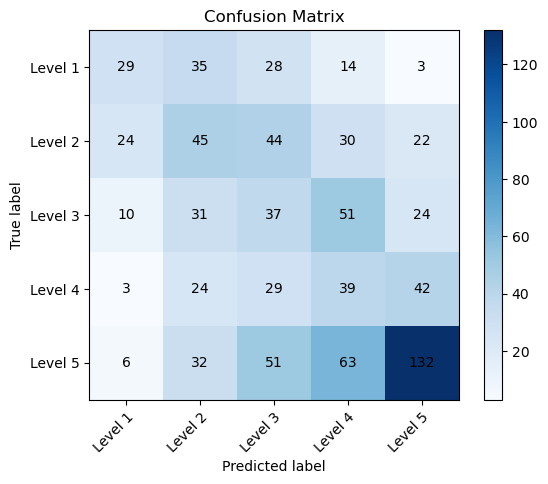

Feature Importance Rankings:
1. no_of_variables: 9.389937051781526
2. ADJ: 7.112502704233941
3. NOUN: 6.742607499231987
4. VERB: 5.698557453180235
5. large_words_cat: 5.695096391613628
6. ADP: 5.510046988026583
7. no_of_equations: 5.299344599581943
8. PUNCT: 4.849917587801269
9. DET: 4.5257431571149755
10. words_per_sentence_cat: 3.8031188481597598
11. has_symbol: 3.5814216008252973
12. has_pow: 3.4333991410200557
13. average_word_length_cat: 3.119842701292927
14. AUX: 3.0761706655973207
15. CCONJ: 2.841159372619047
16. type: 2.7899442601949223
17. word_count_cat: 2.7356804872784437
18. PRON: 2.6314098646148243
19. SCONJ: 2.5678291365552868
20. NUM: 2.1847920523041693
21. PROPN: 2.014950011783589
22. has_fraction: 1.8123110743558573
23. ADV: 1.7783429295379733
24. has_digits: 1.652082422397626
25. sentence_count_cat: 0.7946661373629005
26. X: 0.7663751310430112
27. has_neq: 0.7615716828303929
28. has_eq: 0.7500445062771725
29. SYM: 0.6429918078998405
30. PART: 0.6420166127215602
31. ha

In [34]:
scores = rf_model(data3, scores=scores, experiment="Experiment3+SMOTE")

In [36]:
scores = rf_model(data3, use_smote_technique=0, scores=scores, experiment="Experiment3")

int64


KeyboardInterrupt: 

### Light GBM

Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 1}
Best Score:  0.47301231802911536
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.77      0.83      1040
           2       0.74      0.71      0.73       926
           3       0.67      0.75      0.71       795
           4       0.69      0.79      0.74       780
           5       0.81      0.78      0.79       924

    accuracy                           0.76      4465
   macro avg       0.76      0.76      0.76      4465
weighted avg       0.77      0.76      0.76      4465

[[800 114  63  45  18]
 [ 46 660 100  75  45]
 [ 30  48 599  59  59]
 [ 12  35  63 618  52]
 [  5  36  68  96 719]]

test_evaluation:

              precisio

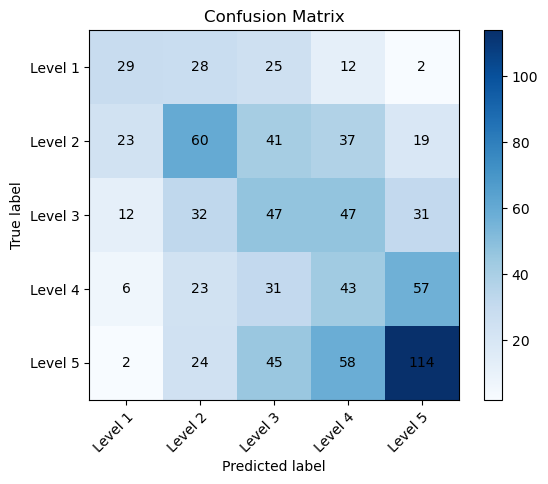

In [14]:
scores = light_GBM(data3, scores=scores, experiment="Experiment3 LGBM + SMOTE")

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.35626767406090554
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.55      0.69       510
           2       0.71      0.69      0.70       687
           3       0.70      0.75      0.72       711
           4       0.67      0.82      0.74       647
           5       0.78      0.83      0.80       833

    accuracy                           0.74      3388
   macro avg       0.76      0.73      0.73      3388
weighted avg       0.76      0.74      0.74      3388

[[278  97  55  47  33]
 [  6 473  80  75  53]
 [  4  55 530  62  60]
 [  2  21  42 529  53]
 [  0  19  47  73 694]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.57      0.31      0.40       131
           2       0.34      0.36      0.35       

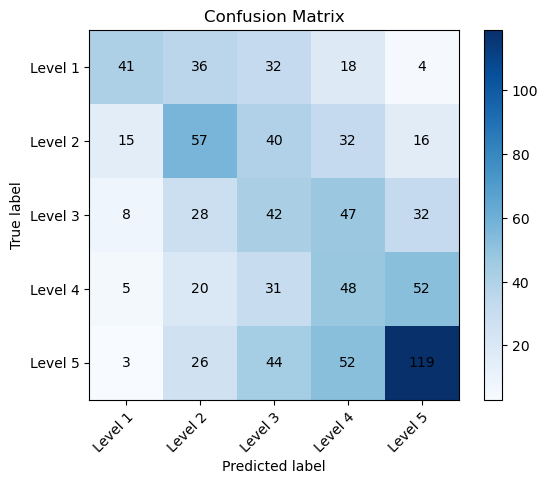

In [15]:
scores = light_GBM(data3, scores=scores, experiment="Experiment1 LGBM", use_smote_technique=0)

## Experiment 4: 

Consider the following features

1. Categorised linguistic features
2. Numerical math features
3. POS features

Run Random Forest on the default 5 class classification and report the results



In [16]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + TARGET_FEATURE]

### Random Forest

int64
Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.45151175811870103
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.71      0.79      1122
           2       0.64      0.71      0.67       804
           3       0.64      0.74      0.69       775
           4       0.62      0.78      0.69       708
           5       0.81      0.68      0.74      1056

    accuracy                           0.72      4465
   macro avg       0.72      0.72      0.72      4465
weighted avg       0.74      0.72      0.72      4465

[[796 144  89  71  22]
 [ 39 572  78  68  47]
 [ 26  63 574  49  63]
 [ 19  45  51 551  42]
 [ 13  69 101 154 719]]

test_evaluation:

          

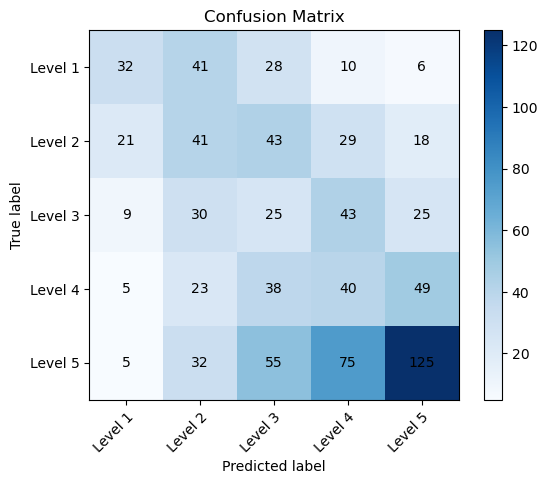

Feature Importance Rankings:
1. ADJ: 7.34537072728523
2. max_degree_of_equations: 6.511027028582387
3. VERB: 5.879494273337294
4. large_words_cat: 5.767107808505958
5. NOUN: 5.651417032846216
6. symbol_count: 5.581398223289283
7. DET: 4.923172070693315
8. ADP: 4.856433356304807
9. number_of_digits: 4.665883213208306
10. PUNCT: 4.554729486186592
11. no_of_pow: 4.432229406321148
12. number_of_numbers: 3.8146202157917566
13. AUX: 3.2356968563007626
14. words_per_sentence_cat: 3.214529389429737
15. word_count_cat: 3.0923306175817933
16. fracs_count: 3.0383227860953004
17. PRON: 2.770570580369638
18. average_word_length_cat: 2.7528612976917066
19. SCONJ: 2.721826694393056
20. CCONJ: 2.5412425315415916
21. NUM: 2.523839601274466
22. PROPN: 2.4292206771006124
23. ADV: 2.271738777137782
24. X: 0.975581439212224
25. eqlts_count: 0.9024732955032179
26. neqlts_count: 0.8016262129737068
27. PART: 0.7105817292230305
28. sentence_count_cat: 0.6292796873116084
29. mod_count: 0.5201075620860847
30. SY

In [39]:
scores = rf_model(data4, scores=scores, experiment="Experiment4+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.3468133314161471
train_evaluation:

              precision    recall  f1-score   support

           1       0.91      0.49      0.63       540
           2       0.66      0.69      0.67       639
           3       0.62      0.77      0.69       605
           4       0.61      0.85      0.71       567
           5       0.81      0.70      0.75      1037

    accuracy                           0.70      3388
   macro avg       0.72      0.70      0.69      3388
weighted avg       0.73      0.70      0.70      3388

[[263 108  79  64  26]
 [ 10 440  71  59  59]
 [  7  40 466  46  46]
 [  4  20  28 480  35]
 [  6  57 110 137 727]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.46      0.27      0.34       122
           2       0.29      0.29   

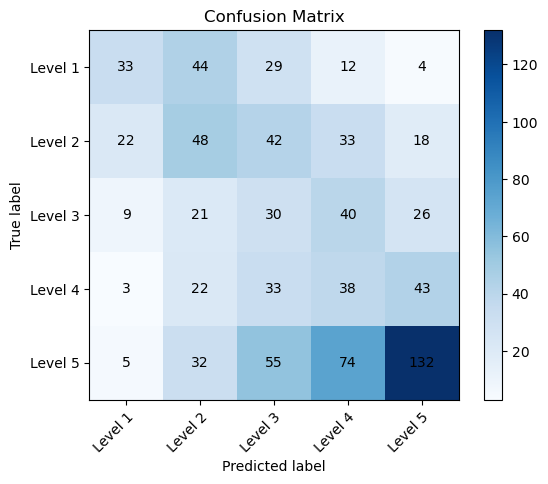

Feature Importance Rankings:
1. ADJ: 7.356357637988027
2. NOUN: 5.878543495098134
3. max_degree_of_equations: 5.5657649629479335
4. symbol_count: 5.543131753076399
5. large_words_cat: 5.503794941277597
6. PUNCT: 5.353664257809135
7. VERB: 5.24142028996863
8. number_of_digits: 5.199675798537136
9. ADP: 4.880293098272297
10. DET: 4.567333408797116
11. no_of_pow: 4.246296531808589
12. number_of_numbers: 3.882624644737868
13. NUM: 3.6293669689900847
14. word_count_cat: 3.3109483722909414
15. AUX: 3.2897368560270173
16. words_per_sentence_cat: 3.285253887318994
17. CCONJ: 2.950782458531803
18. PRON: 2.8268136341180945
19. SCONJ: 2.7421854257401965
20. average_word_length_cat: 2.483128050423843
21. fracs_count: 2.3435554694741834
22. PROPN: 2.0996148692376133
23. ADV: 1.759342211054896
24. eqlts_count: 1.0933877422811733
25. PART: 0.969936858672805
26. sentence_count_cat: 0.9647851850851119
27. neqlts_count: 0.9491894539790078
28. X: 0.8402532272019739
29. mod_count: 0.558237575278804
30. SY

In [40]:
scores = rf_model(data4, use_smote_technique=0, scores=scores, experiment="Experiment4")

### Light GBM

Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.4743561030235163
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.82      0.87      1008
           2       0.79      0.77      0.78       909
           3       0.75      0.81      0.78       829
           4       0.77      0.87      0.82       788
           5       0.85      0.81      0.83       931

    accuracy                           0.82      4465
   macro avg       0.82      0.82      0.82      4465
weighted avg       0.82      0.82      0.82      4465

[[831  83  46  33  15]
 [ 27 703  82  58  39]
 [ 20  45 672  41  51]
 [  5  26  37 687  33]
 [ 10  36  56  74 755]]

test_evaluation:

              precision

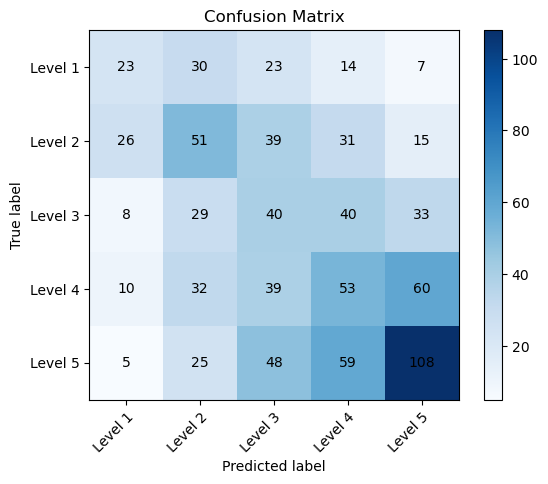

In [17]:
scores = light_GBM(data4, scores=scores, experiment="Experiment4 LGBM + SMOTE")

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 1}
Best Score:  0.35213047324000124
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.56      0.70       499
           2       0.72      0.70      0.71       685
           3       0.67      0.76      0.71       658
           4       0.69      0.82      0.75       659
           5       0.78      0.79      0.78       887

    accuracy                           0.74      3388
   macro avg       0.76      0.73      0.73      3388
weighted avg       0.75      0.74      0.74      3388

[[278  82  65  46  28]
 [  5 480  80  60  60]
 [  6  38 503  52  59]
 [  1  32  39 539  48]
 [  0  33  67  89 698]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.46      0.25      0.33       131
           2       0.26      0.28      0.27       

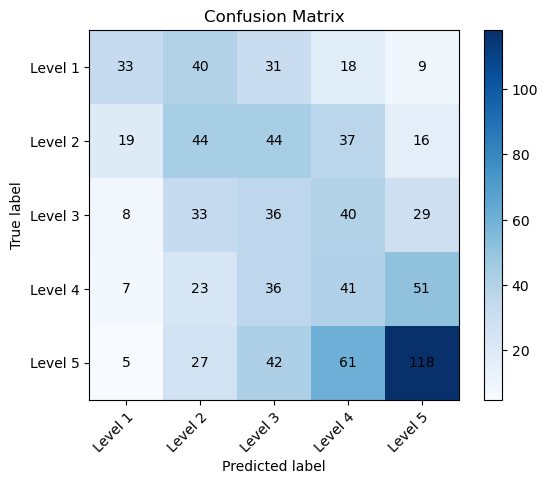

In [18]:
scores = light_GBM(data4, scores=scores, experiment="Experiment1 LGBM", use_smote_technique=0)

## Experiment 5

Consider the following features

1. Categorised linguistic features
2. Numerical Math features
3. POS features
4. Math vocab

In [19]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + TARGET_FEATURE]

### Random Forest

int64
Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.45375139977603585
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.70      0.79      1153
           2       0.66      0.71      0.69       833
           3       0.64      0.76      0.70       748
           4       0.66      0.84      0.74       695
           5       0.83      0.72      0.77      1036

    accuracy                           0.74      4465
   macro avg       0.74      0.75      0.74      4465
weighted avg       0.76      0.74      0.74      4465

[[805 169  88  68  23]
 [ 44 593  84  61  51]
 [ 27  46 572  49  54]
 [  8  30  46 587  24]
 [  9  55 103 128 741]]

test_evaluation:

       

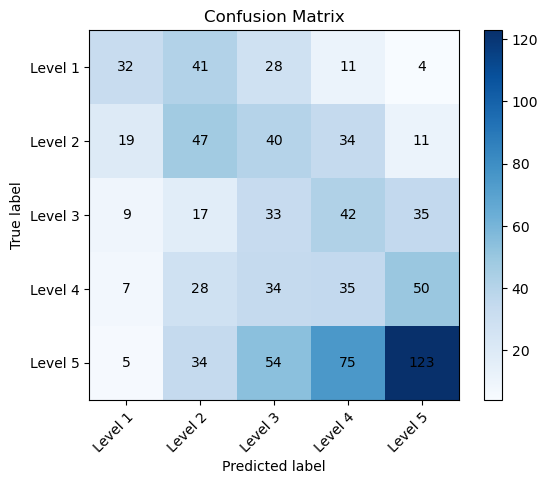

Feature Importance Rankings:
1. symbol_count: 6.345110126548395
2. ADJ: 6.344824185453018
3. max_degree_of_equations: 6.176831910153982
4. VERB: 6.0591720829929505
5. large_words_cat: 5.320881011311564
6. NOUN: 5.318013082870068
7. no_of_pow: 4.887110920384594
8. number_of_digits: 4.599506122492856
9. number_of_math_vocab: 4.45590510576646
10. DET: 4.4494646651899945
11. ADP: 4.298934054353588
12. PUNCT: 4.057261376737094
13. number_of_numbers: 3.5801869011555674
14. average_word_length_cat: 3.2019384450651693
15. word_count_cat: 3.0685281238674293
16. words_per_sentence_cat: 3.0263921362167783
17. AUX: 2.9035510791013825
18. fracs_count: 2.8306358159012834
19. PRON: 2.6905133455482564
20. SCONJ: 2.665298503703687
21. NUM: 2.437885578146758
22. CCONJ: 2.2843624079567926
23. PROPN: 1.9785901516389914
24. ADV: 1.5409954324865451
25. neqlts_count: 1.1993357062046233
26. X: 0.8898191887870711
27. eqlts_count: 0.8194447600525977
28. sentence_count_cat: 0.6382141525536152
29. mod_count: 0.59

In [42]:
scores = rf_model(data5, scores=scores, experiment="Experiment5+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.358627991790957
train_evaluation:

              precision    recall  f1-score   support

           1       0.90      0.46      0.61       564
           2       0.66      0.69      0.67       638
           3       0.64      0.78      0.70       614
           4       0.63      0.87      0.73       575
           5       0.82      0.74      0.78       997

    accuracy                           0.71      3388
   macro avg       0.73      0.71      0.70      3388
weighted avg       0.74      0.71      0.71      3388

[[261 115  85  66  37]
 [ 13 439  71  65  50]
 [  9  38 479  43  45]
 [  0  21  28 499  27]
 [  7  52  91 113 734]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.43      0.24      0.31       130
           2       0.26    

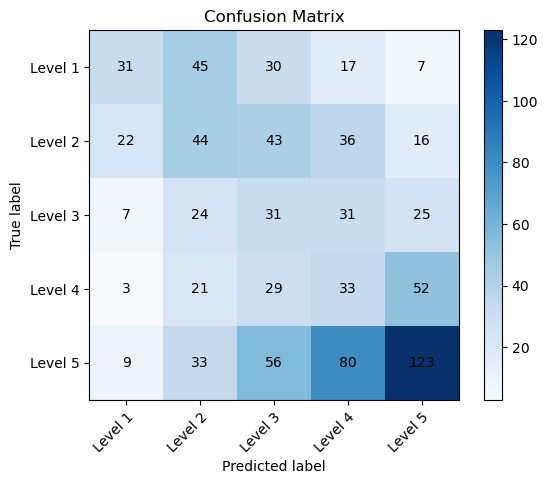

Feature Importance Rankings:
1. ADJ: 6.250457343919742
2. symbol_count: 5.806475921828129
3. NOUN: 5.647424566931386
4. max_degree_of_equations: 5.586586019269537
5. VERB: 5.537923549416892
6. DET: 5.216489524328386
7. large_words_cat: 5.167852147224507
8. PUNCT: 5.0483501815786385
9. number_of_digits: 5.011798309062976
10. number_of_math_vocab: 4.728538424365029
11. no_of_pow: 4.0176505107522
12. number_of_numbers: 3.9746802309646347
13. ADP: 3.8850256304128727
14. word_count_cat: 3.217253697711184
15. AUX: 3.058369352642564
16. NUM: 2.9516942945471603
17. words_per_sentence_cat: 2.9291109538290807
18. PRON: 2.7922606729846526
19. SCONJ: 2.6376139262526688
20. CCONJ: 2.4425856631064278
21. fracs_count: 2.3856046964957156
22. average_word_length_cat: 2.1618581051334673
23. PROPN: 2.0815434818802054
24. ADV: 1.730688685764998
25. neqlts_count: 1.0062159256542111
26. eqlts_count: 0.9887723510558909
27. X: 0.9637290180779853
28. mod_count: 0.8038118231174455
29. sentence_count_cat: 0.6523

In [43]:
scores = rf_model(data5, use_smote_technique=0, scores=scores, experiment="Experiment5")

### Light GBM

Class distribution before SMOTE: Counter({5: 893, 4: 786, 3: 754, 2: 665, 1: 290})
Class distribution after SMOTE: Counter({3: 893, 1: 893, 5: 893, 2: 893, 4: 893})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.4817469204927212
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.82      0.88      1015
           2       0.78      0.78      0.78       892
           3       0.75      0.82      0.78       815
           4       0.77      0.85      0.80       809
           5       0.84      0.80      0.82       934

    accuracy                           0.81      4465
   macro avg       0.81      0.81      0.81      4465
weighted avg       0.82      0.81      0.82      4465

[[835  83  46  38  13]
 [ 25 699  67  50  51]
 [ 13  45 670  45  42]
 [ 10  33  40 685  41]
 [ 10  33  70  75 746]]

test_evaluation:

              precision

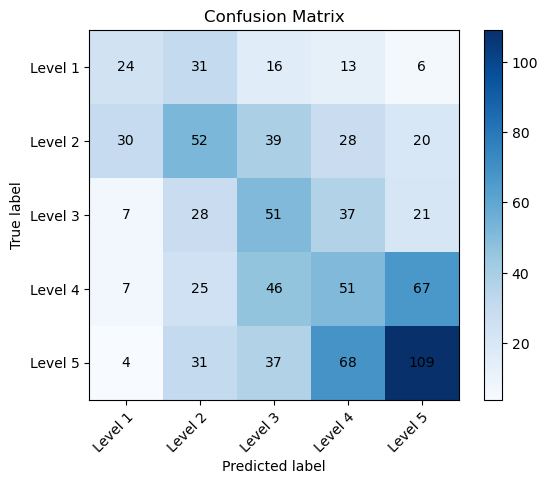

In [20]:
scores = light_GBM(data5, scores=scores, experiment="Experiment5 LGBM + SMOTE")

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.3547936192555217
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.63      0.76       444
           2       0.81      0.75      0.78       717
           3       0.75      0.82      0.78       688
           4       0.76      0.85      0.80       698
           5       0.82      0.87      0.84       841

    accuracy                           0.80      3388
   macro avg       0.82      0.78      0.79      3388
weighted avg       0.81      0.80      0.80      3388

[[279  63  44  37  21]
 [  5 538  70  54  50]
 [  4  24 562  48  50]
 [  1  23  35 596  43]
 [  1  17  43  51 729]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.47      0.29      0.36       116
           2       0.29      0.29      0.29       1

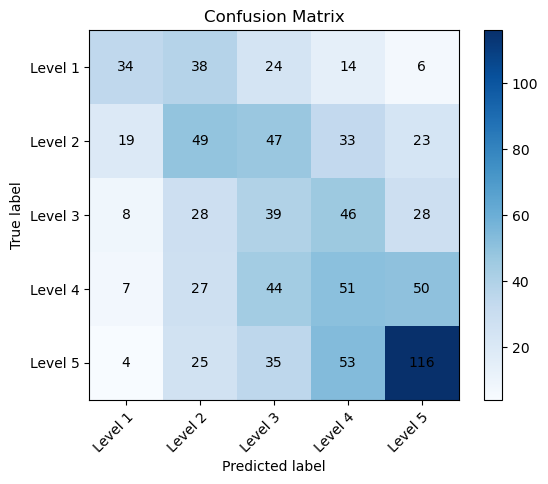

In [21]:
scores = light_GBM(data5, scores=scores, experiment="Experiment5 LGBM", use_smote_technique=0)

In [44]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.638967,0.313509
1,Experiment1,0.545046,0.312562
2,Experiment2+SMOTE,0.675157,0.309422
3,Experiment2,0.611745,0.309194
4,Experiment3+SMOTE,0.732511,0.320002
5,Experiment3,0.681888,0.338960
6,Experiment4+SMOTE,0.715718,0.294544
7,Experiment4,0.702509,0.314427
8,Experiment5+SMOTE,0.735749,0.304566
9,Experiment5,0.715274,0.293132


In [45]:
scores.to_csv("../Results/GT_5Levels.csv", index=False)